In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

In [119]:
def read_data(number: int) -> pd.DataFrame:
    df_acc = pd.read_csv(f"../data/Accelerometer Data/acc_user{number}.csv")
    df_care = pd.read_csv(f"../data/Care Record Data/train{number}.csv")
    return df_acc, df_care
df_acc, df_care = read_data(8)

In [90]:
display(df_acc.head()), display(df_care.head());

,subject_id,datetime,x,y,z
0,8,2018-06-03T07:55:29.965+0900,2.375,-11.837,-0.664
1,8,2018-06-03T08:29:26.250+0900,2.375,3.486,8.968
2,8,2018-06-03T09:22:56.925+0900,2.375,4.405,8.436
3,8,2018-06-02T13:01:17.956+0900,2.375,4.367,8.849
4,8,2018-06-03T09:28:48.797+0900,2.375,4.060,8.707


,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,1653,8,4,排泄,8,17777,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
1,1653,8,4,排泄,35,17778,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
2,1653,8,4,排泄,36,17779,2018-02-23 23:58:02+09:00,2018-02-23 23:58:07+09:00,2018-02-23-23.0
3,1654,8,4,排泄,40,17782,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0
4,1654,8,4,排泄,41,17781,2018-02-23 23:59:37+09:00,2018-02-23 23:59:39+09:00,2018-02-23-23.0


In [92]:
df_acc.isnull().sum(), df_care.isnull().sum()

(subject_id    0
 datetime      0
 x             0
 y             0
 z             0
 dtype: int64,
 id                        0
 user_id                   0
 activity_type_id          0
 activity_type             0
 target_id                 0
 activity2user_id          0
 start                     0
 finish                  273
 year-month-date-hour      0
 dtype: int64)

In [93]:
# drop
df_care = df_care.dropna()

In [94]:
df_care['start'] = pd.to_datetime(df_care['start'], format='%Y-%m-%d %H:%M:%S')
df_care['finish'] = pd.to_datetime(df_care['finish'], format='%Y-%m-%d %H:%M:%S')

In [95]:
df_care["time_length"] = df_care["finish"] - df_care["start"]

In [96]:
df_care["time_length_seconds"] = df_care["time_length"].map(lambda x: x.total_seconds())

<AxesSubplot:>

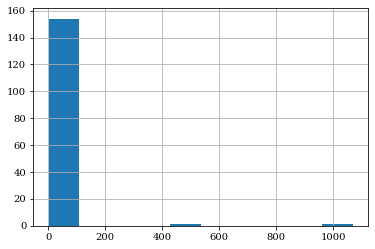

In [102]:
df_care["time_length_seconds"].value_counts().hist()

In [97]:
df_care_group = df_care.groupby(["activity_type_id"])

In [118]:
df_care_group["time_length_seconds"].agg([max, min, np.mean, np.var, len])

,max,min,mean,var,len
activity_type_id,,,,,
1,687.0,1.0,272.050000,8.120225e+04,120
2,3600.0,-86314.0,-21.397603,8.184879e+06,918
3,99.0,1.0,9.714286,2.907104e+02,112
4,307.0,0.0,22.463030,2.086043e+03,825
5,202.0,1.0,28.794393,4.062750e+03,107
7,251.0,1.0,39.082353,6.283243e+03,85
8,51.0,1.0,8.937500,2.258669e+02,32
9,57.0,1.0,7.797297,1.741364e+02,74
10,160.0,1.0,47.714286,2.154125e+03,49


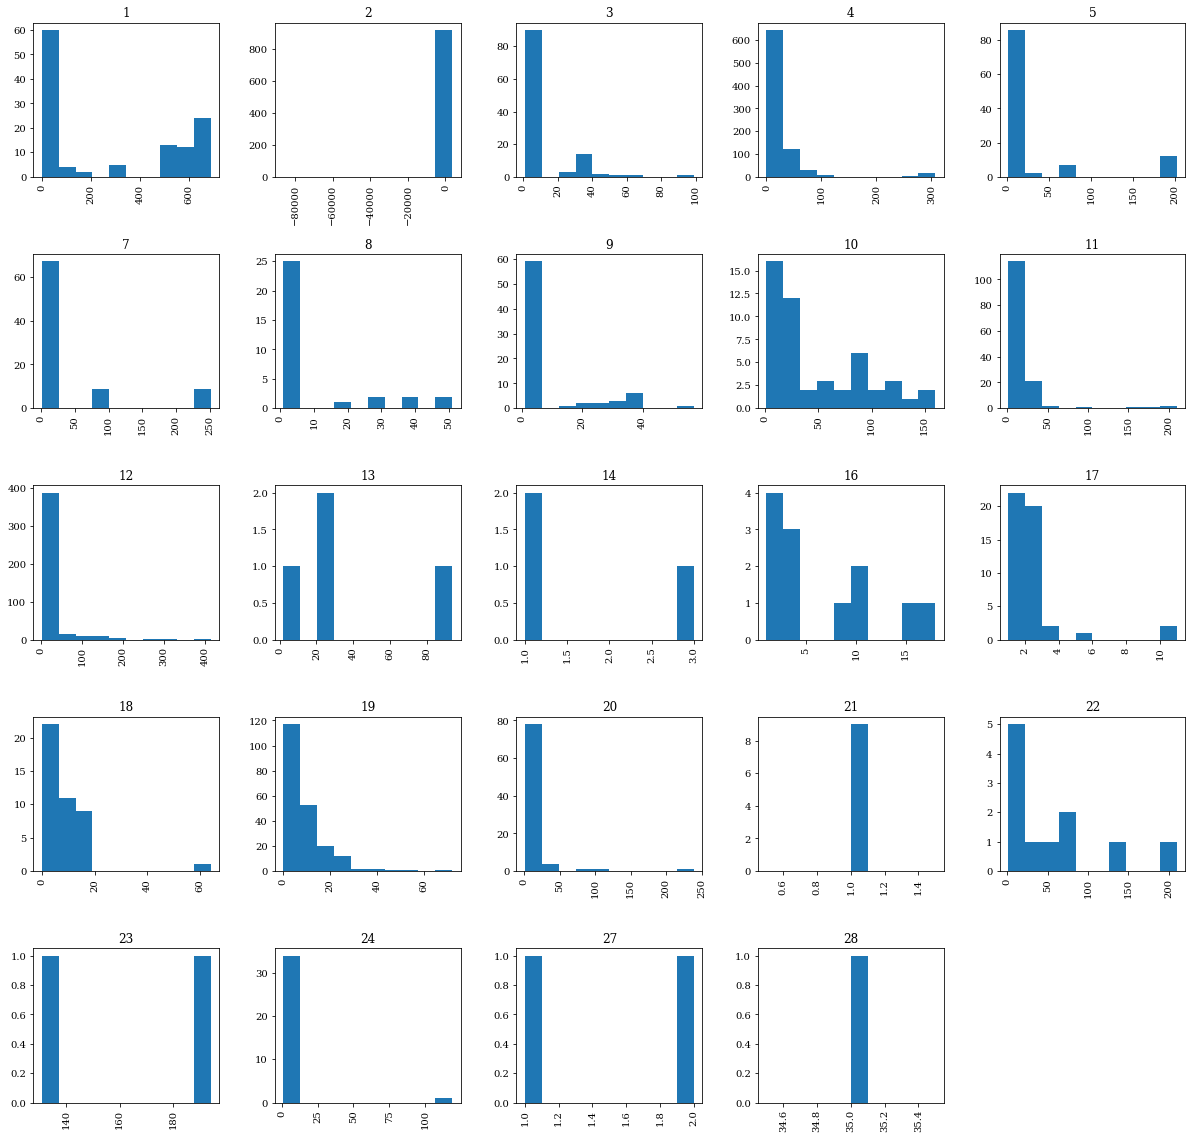

In [98]:
df_care.hist(column="time_length_seconds", by="activity_type_id", figsize=(20, 20))

In [121]:
df_acc.sort_index("datetime")

/tmp/ipykernel_239725/3516199098.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df_acc.sort_index("datetime")


ValueError: No axis named datetime for object type DataFrame

## 全データ

In [132]:
from glob import glob
df = pd.DataFrame()
for path in glob("../data/Care Record Data/*"):
    tmp = pd.read_csv(path)
    print(tmp.shape)
    df = pd.concat([df, tmp])

(1029, 9)
(3373, 9)
(2186, 9)
(3632, 9)
(765, 9)


In [334]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,4173,15,26,休憩,15,25397,2018-03-31 21:29:28+09:00,2018-03-31 22:02:45+09:00,2018-03-31-21.0
1,4410,15,26,休憩,15,26067,2018-04-03 21:49:23+09:00,2018-04-03 22:13:44+09:00,2018-04-03-21.0
2,6280,15,26,休憩,15,31067,2018-04-15 21:53:08+09:00,2018-04-15 22:14:46+09:00,2018-04-15-21.0
3,7928,15,26,休憩,15,34782,2018-04-21 21:34:30+09:00,2018-04-21 22:02:20+09:00,2018-04-21-21.0
4,12797,15,26,休憩,15,45514,2018-05-06 21:49:48+09:00,2018-05-06 22:08:50+09:00,2018-05-06-21.0


In [145]:
df.groupby(['activity_type_id', 'activity_type'], as_index=False).count()[['activity_type_id', 'activity_type']]

,activity_type_id,activity_type
0,1,バイタル
1,2,食事・服薬
2,3,口腔ケア
3,4,排泄
4,5,入浴・清拭
5,6,処置
6,7,活力朝礼・ラジオ体操
7,8,リハビリ・レク
8,9,モーニングケア
9,10,日中利用者対応


In [146]:
df.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,4173,15,26,休憩,15,25397,2018-03-31 21:29:28+09:00,2018-03-31 22:02:45+09:00,2018-03-31-21.0
1,4410,15,26,休憩,15,26067,2018-04-03 21:49:23+09:00,2018-04-03 22:13:44+09:00,2018-04-03-21.0
2,6280,15,26,休憩,15,31067,2018-04-15 21:53:08+09:00,2018-04-15 22:14:46+09:00,2018-04-15-21.0
3,7928,15,26,休憩,15,34782,2018-04-21 21:34:30+09:00,2018-04-21 22:02:20+09:00,2018-04-21-21.0
4,12797,15,26,休憩,15,45514,2018-05-06 21:49:48+09:00,2018-05-06 22:08:50+09:00,2018-05-06-21.0


In [332]:
# df.groupby(["user_id", "activity_type_id"])["activity_type_id"].agg([len])

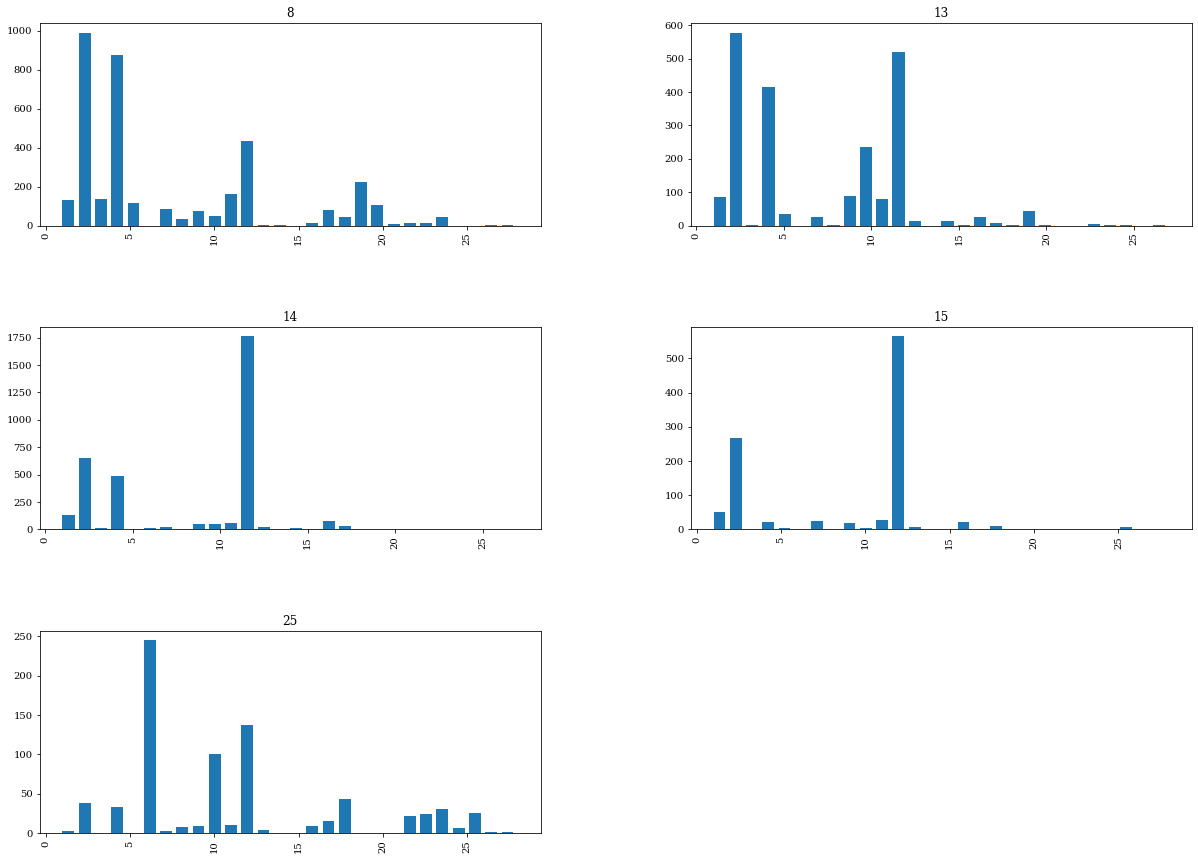

In [333]:
df.hist(by='user_id', column='activity_type_id', figsize=(20, 15), bins=28, width=0.7);

In [336]:
tmp = df.groupby(["user_id", "activity_type_id"])["activity_type_id"].agg([len]).reset_index().pivot('user_id', 'activity_type_id','len').fillna(0)

In [340]:
tmp["sum"] = tmp.sum(axis=0)

In [341]:
tmp

activity_type_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,sum
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,132.0,989.0,136.0,875.0,114.0,0.0,85.0,32.0,74.0,49.0,163.0,432.0,4.0,3.0,0.0,12.0,78.0,45.0,221.0,105.0,10.0,12.0,15.0,43.0,0.0,0.0,2.0,1.0,41.0
13,85.0,578.0,2.0,416.0,35.0,0.0,27.0,1.0,90.0,236.0,80.0,520.0,13.0,13.0,2.0,25.0,9.0,3.0,43.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,45.0
14,126.0,650.0,14.0,485.0,1.0,11.0,25.0,0.0,49.0,48.0,58.0,1760.0,17.0,14.0,1.0,80.0,26.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,31.0
15,52.0,268.0,2.0,21.0,3.0,0.0,23.0,0.0,17.0,3.0,27.0,564.0,7.0,1.0,1.0,21.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,4.0
25,2.0,38.0,0.0,33.0,0.0,245.0,2.0,8.0,9.0,100.0,10.0,137.0,4.0,0.0,0.0,9.0,15.0,43.0,0.0,0.0,0.0,22.0,24.0,30.0,6.0,26.0,1.0,1.0,7.0
